<a href="https://colab.research.google.com/github/ahcamachod/1921-machine-learning-clasificacion-entre-bastidores/blob/main/tecnicas_de_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning: Clasificación entre Bastidores**

En este notebook estaremos desarrollando varias técnicas de clasificación para un conjunto de datos de una empresa de telecomunicaciones.

En caso de que desees consultar el dataset original, este se encuentra en el siguiente enlace:
https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets?select=churn-bigml-20.csv

### **Procedimientos:**
1. Preparar el entorno de desarrollo en el cuaderno de Jupiter para Google Colab
2. Importar bibliotecas de los métodos a utilizar
3. Cargar el dataset en un DataFrame
4. Consultar información sobre las variables del Dataframe
5. Preprocesamiento:
    - Eliminar variables innecesarias o que no permitan leer el dataframe
    - Tratamiento de variables con valores faltantes
    - Tratamiento de datos extremos y datos atípicos
    - Normalizar los valores de todas las variables
6. Ejemplo básico de entrenamiento de un modelo
    - Definir los feactures
    - Elegimos el modelo
    - Probamos el modelo
    - Probamos la exactitud del modelo
    - Calculamos taza de aciertos
7. Entrenamiento de modelo con muestras de pruebas proporcionales
    - Estratificación proporcional de las muestras de entrada
8. Estimador lineal para un dataset de cumplimento de entrega de proyectos
9. Estimador no lineal
10. Dummy classifiers y Árboles de decisión
    - El clasificador Dummy
    - Arbol de decisión con y sin datos estandarizados
    - Diagrama de árbol de decisión y sus parámetros

### **1. Preparar el entorno de desarrollo en el cuaderno de Jupiter para Google Colab**

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
# pip install -r "/content/drive/MyDrive/Colab Notebooks/231115-1_machine_learning_clasificacion_entre_bastidores/requirements.txt"

In [49]:
# How can I suppresed Python warnings in Jupyter Notebook
# Why not just set n_init=10 explicitly and retain the same value as the default and get rid of those warnings?
import warnings
warnings.filterwarnings('ignore')

### **2. Importar bibliotecas de los métodos a utilizar**

In [50]:
# Las versiones de las bibliotecas que usaremos son las siguientes:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# pip: pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

print(f'matplotlib --> {matplotlib.__version__}')
print(f'pandas --> {pd.__version__}')
print(f'numpy --> {np.__version__}')
print(f'seaborn --> {sns.__version__}')
print(f'sklearn --> {sklearn.__version__}')

matplotlib --> 3.7.1
pandas --> 1.5.3
numpy --> 1.23.5
seaborn --> 0.12.2
sklearn --> 1.2.2


### **3. Cargar el dataset en un dataframe**

In [51]:
ruta= '/content/drive/MyDrive/Colab Notebooks/231115-1_machine_learning_clasificacion_entre_bastidores/datasets/customer_churn.csv'
clientes_servicios_df = pd.read_csv(ruta)

### **4. Consultar información sobre las variables del Dataframe**

In [52]:
clientes_servicios_df.head()

,Mayor65Anos,Conyuge,Dependientes,MesesDeContrato,TelefonoFijo,VariasLineasTelefonicas,ServicioDeInternet,SeguridadOnline,BackupOnline,SeguroEnDispositivo,SoporteTecnico,TVaCable,StreamingDePeliculas,TipoDeContrato,PagoOnline,FormaDePago,CuentaMensual,Churn
0,0,Si,No,1,No,SinServicioTelefonico,DSL,No,Si,No,No,No,No,Mensual,Si,ChequeDigital,29.85,No
1,0,No,No,34,Si,No,DSL,Si,No,Si,No,No,No,Anual,No,ChequePapel,56.95,No
2,0,No,No,2,Si,No,DSL,Si,Si,No,No,No,No,Mensual,Si,ChequePapel,53.85,Si
3,0,No,No,45,No,SinServicioTelefonico,DSL,Si,No,Si,Si,No,No,Anual,No,DebitoAutomatico,42.30,No
4,0,No,No,2,Si,No,FibraOptica,No,No,No,No,No,No,Mensual,Si,ChequeDigital,70.70,Si


In [53]:
clientes_servicios_df.shape

(7043, 18)

In [54]:
clientes_servicios_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Mayor65Anos              7043 non-null   int64  
 1   Conyuge                  7043 non-null   object 
 2   Dependientes             7043 non-null   object 
 3   MesesDeContrato          7043 non-null   int64  
 4   TelefonoFijo             7043 non-null   object 
 5   VariasLineasTelefonicas  7043 non-null   object 
 6   ServicioDeInternet       7043 non-null   object 
 7   SeguridadOnline          7043 non-null   object 
 8   BackupOnline             7043 non-null   object 
 9   SeguroEnDispositivo      7043 non-null   object 
 10  SoporteTecnico           7043 non-null   object 
 11  TVaCable                 7043 non-null   object 
 12  StreamingDePeliculas     7043 non-null   object 
 13  TipoDeContrato           7043 non-null   object 
 14  PagoOnline              

## Aula 1

### 1.2 Importando los datos

### 1.3 Tipos de variables

Identificar que variables son cualitativas (categoricas) ordinales o nominales y cuales son cuantitativas (numéricas) discretas o continuas. Sobre las variables cualitativas hacemos las transformaciones necesarias para poder alimentar los modelos de clasificación:
- Conyuge                  (Cualitativa,   Nominal)
- Dependientes             (Cualitativa,   Nominal)
- MesesDeContrato          (Cuantitativa,  discreta)  
- TelefonoFijo             (Cualitativa,   Nominal)
- VariasLineasTelefonicas  (Cualitativa,   Nominal)
- ServicioDeInternet       (Cualitativa,   Nominal)
- SeguridadOnline          (Cualitativa,   Nominal)
- BackupOnline             (Cualitativa,   Nominal)
- SeguroEnDispositivo      (Cualitativa,   Nominal)
- SoporteTecnico           (Cualitativa,   Nominal)
- TVaCable                 (Cualitativa,   Nominal)
- StreamingDePeliculas     (Cualitativa,   Nominal)
- TipoDeContrato           (Cualitativa,   Nominal)
- PagoOnline               (Cualitativa,   Nominal)
- FormaDePago              (Cualitativa,   Nominal)
- CuentaMensual            (Cuantitativa,  contínua)
- Churn                    (Cualitativa,   Nominal)      

In [55]:
clientes_servicios_df.Conyuge.value_counts()


No    3641
Si    3402
Name: Conyuge, dtype: int64

In [56]:
clientes_servicios_df.Dependientes.value_counts()

No    4933
Si    2110
Name: Dependientes, dtype: int64

In [57]:
traduccion = {'Si':1, 'No':0}
datos_modificados_df = clientes_servicios_df[['Conyuge','Dependientes','TelefonoFijo', 'PagoOnline','Churn']].replace(traduccion)
datos_modificados_df.head()

,Conyuge,Dependientes,TelefonoFijo,PagoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [58]:
# A partir de los diferentes valores de cada variable categorica se crea una columna para cada valor que contienen solo ceros y unos
datos_dummy_df = pd.get_dummies(clientes_servicios_df.drop(columns=['Conyuge','Dependientes','TelefonoFijo', 'PagoOnline','Churn'], axis = 1))

In [59]:

clientes_servicios_normalizados_df = pd.concat([datos_modificados_df,datos_dummy_df], axis = 1)
clientes_servicios_normalizados_df

,Conyuge,Dependientes,TelefonoFijo,PagoOnline,Churn,Mayor65Anos,MesesDeContrato,CuentaMensual,VariasLineasTelefonicas_No,VariasLineasTelefonicas_Si,VariasLineasTelefonicas_SinServicioTelefonico,ServicioDeInternet_DSL,ServicioDeInternet_FibraOptica,ServicioDeInternet_No,SeguridadOnline_No,SeguridadOnline_Si,SeguridadOnline_SinServicioDeInternet,BackupOnline_No,BackupOnline_Si,BackupOnline_SinServicioDeInternet,SeguroEnDispositivo_No,SeguroEnDispositivo_Si,SeguroEnDispositivo_SinServicioDeInternet,SoporteTecnico_No,SoporteTecnico_Si,SoporteTecnico_SinServicioDeInternet,TVaCable_No,TVaCable_Si,TVaCable_SinServicioDeInternet,StreamingDePeliculas_No,StreamingDePeliculas_Si,StreamingDePeliculas_SinServicioDeInternet,TipoDeContrato_Anual,TipoDeContrato_Bienal,TipoDeContrato_Mensual,FormaDePago_ChequeDigital,FormaDePago_ChequePapel,FormaDePago_DebitoAutomatico,FormaDePago_TarjetaDeCredito
0,1,0,0,1,0,0,1,29.85,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,45,42.30,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,0,24,84.80,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0
7039,1,1,1,1,0,0,72,103.20,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1
7040,1,1,0,1,0,0,11,29.60,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0
7041,1,0,1,1,1,1,4,74.40,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0


### 1.5 Definición Formal

Información para la clasificación:

$X$ = inputs (datos de entrada)

$y$ = outputs (datos de saída)

In [60]:
pd.set_option('display.max_columns',39)

In [61]:
clientes_servicios_normalizados_df.head()

,Conyuge,Dependientes,TelefonoFijo,PagoOnline,Churn,Mayor65Anos,MesesDeContrato,CuentaMensual,VariasLineasTelefonicas_No,VariasLineasTelefonicas_Si,VariasLineasTelefonicas_SinServicioTelefonico,ServicioDeInternet_DSL,ServicioDeInternet_FibraOptica,ServicioDeInternet_No,SeguridadOnline_No,SeguridadOnline_Si,SeguridadOnline_SinServicioDeInternet,BackupOnline_No,BackupOnline_Si,BackupOnline_SinServicioDeInternet,SeguroEnDispositivo_No,SeguroEnDispositivo_Si,SeguroEnDispositivo_SinServicioDeInternet,SoporteTecnico_No,SoporteTecnico_Si,SoporteTecnico_SinServicioDeInternet,TVaCable_No,TVaCable_Si,TVaCable_SinServicioDeInternet,StreamingDePeliculas_No,StreamingDePeliculas_Si,StreamingDePeliculas_SinServicioDeInternet,TipoDeContrato_Anual,TipoDeContrato_Bienal,TipoDeContrato_Mensual,FormaDePago_ChequeDigital,FormaDePago_ChequePapel,FormaDePago_DebitoAutomatico,FormaDePago_TarjetaDeCredito
0,1,0,0,1,0,0,1,29.85,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,45,42.30,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0



$y_i$ = $f(x_i)$

In [62]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

Nuevos pares de información = ($Xmaria$, $ymaria$)

### 1.6 Balanceo de los datos

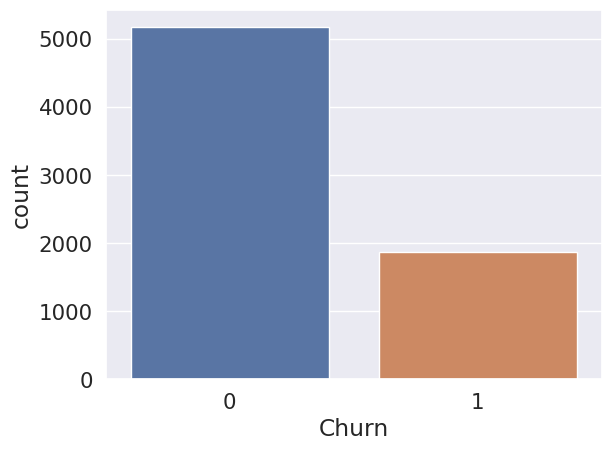

In [63]:
sns.countplot(x='Churn' ,data = clientes_servicios_normalizados_df);

In [64]:
clientes_servicios_normalizados_df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

Este desbalance el los valores de la variable no permite que el clasificador pueda trazar una frontera divisoria para la clasificación, por lo tanto hay que balancear estos valores. Como se trata de un dataset desbalanceado, es decir, las clases presentan una diferencia en frecuencia bastante notable. Entonces se puede optar por realizar un balanceo con un sobre-muestreo utilizando el paquete over_sampling de imblearn.

In [65]:
from imblearn.over_sampling import SMOTE
X = clientes_servicios_normalizados_df.drop(columns = 'Churn', axis =1)
y = clientes_servicios_normalizados_df['Churn']

smt = SMOTE(random_state = 123)
X, y =smt.fit_resample(X, y)

In [66]:
# Concatenamos para agregar los nuevos valores que balancean las dos muestas de valores 1´s y 0´s
clientes_servicios_normalizados_df = pd.concat([X,y], axis = 1)
clientes_servicios_normalizados_df.shape

(10348, 39)

In [67]:
clientes_servicios_normalizados_df.Churn.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

**Lo importante de esta sección:**

- Identificar los tipos de variables: Numéricas y Categóricas;
- Comprender el concepto de clasificación y cuando debemos utilizarlo;
- Explicar los cálculos matemáticos por detrás de la clasificación;
- Diferenciar la clasificación de la regresión;
- Demostrar el balanceo de los datos.

## Aula 2

### 2.2 KNN entre bastidores

**K Vecinos mas Cercanos**: K-nearest neighbors (KNN) es un algoritmo de Machine Learning que puede ser utilizado para la clasificación. Para llegar a la previsión final, KNN sigue algunos pasos en un orden específico.

1. Recibir las características de la muestra.
2. Calcular la distancia de la nueva muestra con las muestras ya existentes.
3. Ordenar las distancias obtenidas de menor a mayor.
4. A partir del número K de vecinos deseados, escoger cuáles son las características que más se asemejan.






In [68]:
Xmaria

[[0,
  0,
  1,
  1,
  0,
  0,
  39.9,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1]]

In [69]:
X = clientes_servicios_normalizados_df.drop(columns ='Churn', axis = 1)
y = clientes_servicios_normalizados_df['Churn']

In [70]:
# Como hay variables con valores diferentes a i´s y 0´s debemos estandarizarlos o
# llevarlos a la misma escala de las otras variables para que no afecten "confundan" al modelo
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [71]:
# Visualizamos los datos del primer cliente que vamos a comparar con los de Maria
X_std[0]

array([ 1.26542767, -0.52771004, -3.06083934,  0.81482091, -0.41318358,
       -1.10771815, -1.3217706 , -0.88447396, -0.83366906,  3.18604176,
        1.51268338, -1.04386816, -0.44617598,  0.86827317, -0.51721942,
       -0.44617598, -0.95834643,  1.57389661, -0.44617598,  1.04285807,
       -0.64211419, -0.44617598,  0.87979784, -0.52426638, -0.44617598,
        1.18690873, -0.77707385, -0.44617598,  1.20311799, -0.78976268,
       -0.44617598, -0.41989297, -0.44648735,  0.73788726,  1.30373042,
       -0.47912706, -0.4360152 , -0.42576817])

In [72]:
Xmaria_std = scaler.transform(pd.DataFrame(Xmaria, columns = X.columns))

En el algoritmo KNN, para que sea hecha la clasificación de los registros con base en los vecinos más cercanos, es necesario utilizar alguna medida para identificar qué tan cercano está el registro de sus vecinos. Existen diversas medidas para evaluar esta proximidad entre variables numéricas que reciben el nombre de medidas de distancia. Cuanto mayor sea el valor de esa medida, más distante un elemento estará del otro, o sea, menor será la similaridad entre ellos.

**Distancia Euclidiana**

La medida de distancia más conocida y más utilizada es la distancia euclidiana. Ella consiste en substraer las coordenadas de una observación por la otra observación, elevar al cuadrado los resultados, sumar todos los valores y extraer la raíz cuadrada.

$$\sqrt{\sum_{i=1}^k(a_{i}-b_{i})^2}$$

**Distancia de Manhattan**

Se trata de una medida de distancia que considera apenas la suma de los módulos de las diferencias entre cada par de coordenadas.

$${\sum_{i=1}^n|a_{i}-b_{i}|}$$

**Distancia de Minkowski**

Es una medida de distancia que es la generalización de otras distancias, como la distancia euclidiana y la de Manhattan. Consiste en extraer el módulo de la diferencia entre cada par de coordenadas elevando el resultado a m, realizar la suma de todos los términos y, finalmente, sacar la raíz m-ésima, en la cual m es un número cualquiera. La distancia euclidiana es un caso a parte cuando m es igual a 2 y la distancia de Manhattan es un caso a parte cuando m es igual a 1.
$$\sqrt[m]{\sum_{i=1}^n|a_{i}-b_{i}|^m}$$

**Distancia de Chebyshev**

Es una medida de distancia que considera tan solo el valor máximo entre los módulos de las diferencias entre las variables. De esta forma, lleva en consideración apenas la variable que posee la mayor diferencia de valores entre las dos observaciones.
$$\max{(|a_{1}-b_{1}|, ..., |a_{n}-b_{n}|)}$$

Existen diversas otras medidas de distancia que pueden ser calculadas y cada una de ellas impacta directamente el resultado del modelo. Las distancias presentadas aquí pueden ser utilizadas en el algoritmo KNN de Scikit-learn, siendo la distancia de Minkowski la medida de distancia por defecto al instanciar el algoritmo, como se encuentra escrito en la documentación.

Podemos modificar la medida de distancia utilizando el argumento metric de la función `sklearn.neighbors.KNeighborsClassifier`

In [73]:
a = Xmaria_std
b = X_std[0]
exponenciacion = np.square(a - b)
suma = np.sum(exponenciacion)
distancia = np.sqrt(suma)
print(f'La distancia euclidiana de Maria respecto al primer cliente es: {distancia}')

La distancia euclidiana de Maria respecto al primer cliente es: 9.546414124830829


### 2.3 Implementando el modelo KNN

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size = 0.3, random_state= 123)


In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric = 'euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [76]:
prevision_knn = knn.predict(X_test)

In [77]:
prevision_knn

array([1, 0, 1, ..., 1, 1, 1])

nuestro modelo nos indica que el primer cliente de X_text abandona, el segundo se queda con los servicos de la empresa , el tercero abandona y asi sucesivamente

**Importante en esta sección:**

- Utilizar la división del conjunto de datos en entrenamiento y prueba;
- Implementar el modelo K-nearest neighbors (KNN);
- Explicar cómo funciona el modelo KNN con ideas básicas;
- Identificar las funciones de distancia.

## Aula 3

### 3.3 Implementando el modelo Bernoulli Naive Bayes

**Modelo Bernoulli Naïve Bayes**

Existen diversos tipos de algoritmos de clasificación de Machine Learning, considerando que cada uno de ellos posee sus características específicas y aplicaciones en diferentes escenarios.

- El algoritmo de Naïve Bayes funciona como un clasificador, pues es utilizado para prever a cuál categoría pertenece una determinada muestra.
- El modelo de Naïve Bayes aplica el concepto de probabilidad utilizando el teorema de Bayes.

Los modelos clasificadores de Naïve Bayes realizan sus cálculos con base en probabilidades y desconsideran la correlación entre las variables.
Estos son los 3 modelos más conocidos que son implementados con el algoritmo Naïve Bayes: BernoulliNB(), GaussianNB() y MultinomialNB().




In [78]:
from sklearn.naive_bayes import BernoulliNB
mediana = np.median(X_train)
bnb = BernoulliNB(binarize = mediana)
bnb.fit(X_train, y_train)

BernoulliNB()

In [79]:
prevision_bnb = bnb.predict(X_test)


Imprimimos el array de resultados de prevision del modelo Bernoulli Naïve Bayes y comparemos con el array de previsiones del modelo K-nearest neighbors (KNN)

In [80]:
prevision_bnb

array([1, 0, 0, ..., 1, 1, 1])

In [81]:
prevision_knn

array([1, 0, 1, ..., 1, 1, 1])

Notamos que los resultados de previsón de los modelos usados son diferentes

**Lo importante en esta sección:**

- Utilizar el Clasificador de Naïve Bayes;
- Explicar los cálculos matemáticos por detrás del modelo;
- Implementar el algoritmo BernoulliNB();
- Explicar la probabilidad condicional y el teorema de Bayes.

## Aula 4

### 4.3 Implementando el modelo de Árbol de Decisión

El proceso de construcción de un árbol de decisión debe tomar en cuenta estos datos importantes:

- **El índice de Gini** nos  informa el grado de heterogeneidad de los datos. El objetivo de él es medir la frecuencia de que un elemento aleatorio de un nodo sea rotulado de manera incorrecta. En otras palabras, este índice es capaz de medir la impureza de un nodo. Ser impuro significa tener una mayor concentración de clases en dicho nodo.
- **Entropía:**La idea básica de la entropía es medir el desorden de los datos de un nodo por medio de la variable clasificadora. Así como el índice de Gini, esta es utilizada para caracterizar la impureza de los datos.

- **Profundidad del árbol de decisión:** En caso que el árbol sea muy "profundo" (verticalmente muchos subniveles de nodos), puede ocurrir el sobreajuste de los datos de entrenamiento, también conocido como **overfitting**. Uno de los problemas debidos a la profundidad del árbol de decisión es que, se ajuste demasiado a los datos de entrenamiento, haciendo que el modelo tenga una alta exactitud para los datos de entrenamiento, pero no generaliza bien con los datos de prueba.

In [82]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)


In [83]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [84]:
# Consulatamos como calificó la importancia de las feactures del dataset según su impacto en la determinación de la variable dependiente
dtc.feature_importances_

array([0.02377959, 0.0140184 , 0.006427  , 0.02068509, 0.01622046,
       0.16336089, 0.22060732, 0.00893062, 0.01068695, 0.00344576,
       0.0026108 , 0.03128648, 0.00027769, 0.00937665, 0.01663757,
       0.00065123, 0.00426312, 0.01081522, 0.00368329, 0.00850781,
       0.00818099, 0.        , 0.01462735, 0.02004135, 0.        ,
       0.00474437, 0.00323532, 0.        , 0.00842423, 0.01127152,
       0.        , 0.07445054, 0.03622159, 0.16358635, 0.0213992 ,
       0.0204582 , 0.01858719, 0.01849987])

Las feactures o atributos con valor mas cercano a 1 es mas importante y aquellas con valores mas cercano a cero son menos importantes. Para entender mejor este array se recomienda graficar el diagrama del arbol de decisiones de este conjunto de datos

In [85]:
prevision_dtc = dtc.predict(X_test)
prevision_dtc

array([0, 0, 0, ..., 1, 1, 1])

Este resultado de prevision es diferente a los resultados de los dos modelos probados anteriomente: Bernoulli Naïve Bayes y K-nearest neighbors (KNN), en la siguiente sección veremos que criterios seguir para escoger el modelo mas apropiado para nuestro conjunto de datos

**Lo importante en esta sección:**

- Explicar el modelo de Árbol de Decisión.
- Interpretar los cálculos matemáticos detrás del modelo de Árbol de Decisión.
- Implementar el algoritmo DecisionTreeClassifier().

## Aula 5

### 5.1 Matriz de Confusión

![img](https://miro.medium.com/max/799/1*XsFcyoLXNdAkbSfNGnxhEg.png)

**Verdadero Negativo (true negative - TN):** Ocurre cuando el modelo clasifica la muestra de forma correcta.

**Falso Positivo (false positive - FP):** El modelo clasifica la muestra de forma incorrecta. También se conoce como Error de Tipo I.

**Falso Negativo (false negative - FN):** El modelo clasifica la muestra de forma incorrecta. También se conoce como Error de Tipo II.

**Verdadero Positivo (true positive - TP):** La clasificación de la muestra corresponde con el conjunto de datos reales.

Comparemos las matrices de confución de nuestros tres modelos

In [86]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, prevision_knn))

[[1125  444]
 [ 152 1384]]


In [87]:
print(confusion_matrix(y_test, prevision_bnb))

[[1075  494]
 [ 233 1303]]


In [88]:
print(confusion_matrix(y_test, prevision_dtc))

[[1241  328]
 [ 278 1258]]


De la comparación observamos:

- El modelo Knn arrojó menos falsos positivos y mas verdaderos negativos.
- El modelo dtc arrojó menos falsos negativos y mas verdaderos positivos
- El modelo bnb obtuvo resultados intermedios

**Gráfico de matriz de confusión con mapa de calor**

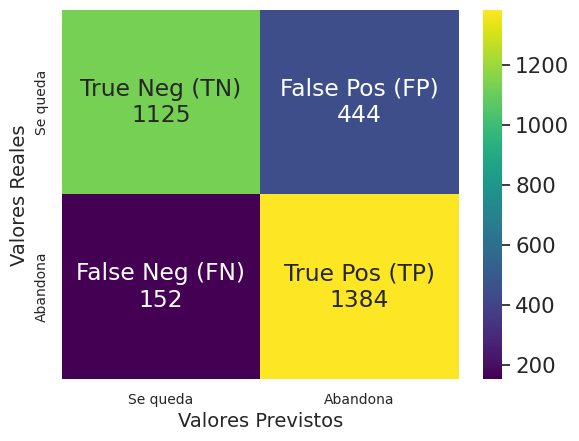

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, prevision_knn)

group_names = ['True Neg (TN)','False Pos (FP)','False Neg (FN)','True Pos (TP)']
group_counts = [f"{value}" for value in cm.flatten()]
labels = [f"{v1}" for v1 in group_names]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]

labels = np.asarray(labels).reshape(cm.shape)

ax = plt.subplot()
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=labels, ax=ax, cmap="viridis", fmt="")

label_font = {'size':'14'}
ax.set_xlabel('Valores Previstos', fontdict=label_font);
ax.set_ylabel('Valores Reales', fontdict=label_font);

ax.tick_params(axis='both', which='major', labelsize=10)
ax.xaxis.set_ticklabels(['Se queda', 'Abandona']);
ax.yaxis.set_ticklabels(['Se queda', 'Abandona']);

### 5.2 Métricas

Cuando trabajamos con problemas de clasificación, es importante utilizar alguna métrica para evaluar el desempeño de nuestro modelo. Sin embargo, existen diferentes métricas de evaluación y es necesario conocer cada una de ellas para saber cuál debemos utilizar de acuerdo con el problema que estamos tratando de resolver.

A través de la identificación de los diagnósticos, es posible extraer métricas de la matriz de confusión que son importantes para evaluar qué también, el modelo está clasificando los datos.

Las principales métricas que pueden ser extraídas de la matriz de confusión son las siguientes:

- Exactitud
- Precisión
- Sensibilidad
- Especificidad
- F1 Score



**Exactitud (Accuracy):**

Evalúa la proporción de aciertos con relación a todas las previsiones realizadas. Esta se obtiene sumando la diagonal principal de la matriz y dividiendo entre la suma de todos los valores

> $Accuracy$ = ${TP + TN \over TP + FP + TN + FN}$

La exactitud es utilizada cuando queremos saber el desempeño general del modelo, esto es, entre todas las clasificaciones realizadas, cuántas fueron clasificadas correctamente por el modelo. La exactitud es un buen indicador general del desempeño del modelo. Pero, en algunas situaciones, como en los modelos de identificación de fraude, esta puede ser un poco engañosa.

In [100]:
from sklearn.metrics import accuracy_score
print(f'La exactitud del modelo KNN es {accuracy_score(y_test, prevision_knn).round(2)*100}%')

La exactitud del modelo KNN es 81.0%


In [101]:
print(f'La exactitud  del modelo BNB es {accuracy_score(y_test, prevision_bnb).round(2)*100}%')

La exactitud  del modelo BNB es 77.0%


In [102]:
print(f'La exactitud  del modelo DTC es {accuracy_score(y_test, prevision_dtc).round(2)*100}%')

La exactitud  del modelo DTC es 80.0%


Esta métrica no es suficiente para concluir que modelo es mejor que los otros dos, para ello calculamos una métrica más: la precisión.

**Precisión (Precision):**

**La precisión** evalúa la proporción de verdaderos positivos entre las predicciones dadas como positivas por el modelo. Esta se obtiene dividiendo los verdaderos positivos entre la suma de las previsiones positivas, calcula cuántas observaciones fueron clasificadas correctamente como positivas ($TP$).

> $precision$ = ${TP \over TP + FP}$

La precisión puede ser utilizada en situaciones en las que los Falsos Positivos son más perjudiciales que los Falsos Negativos. Por ejemplo, en un modelo de clasificación para reconocer una buena inversión.

In [103]:
from sklearn.metrics import precision_score
print(f'La precision del modelo KNN es {precision_score(y_test, prevision_knn).round(2)*100}%')

La precision del modelo KNN es 76.0%


In [104]:
print(f'La precision del modelo BNB es {precision_score(y_test, prevision_bnb).round(2)*100}%')

La precision del modelo BNB es 73.0%


In [105]:
print(f'La precision del modelo DTC es {precision_score(y_test, prevision_dtc).round(2)*100}%')

La precision del modelo DTC es 79.0%


El modelo DTC presenta la mejor precision

**Sensibilidad (Recall):**


**La sensibilidad** evalúa la proporción de verdaderos positivos entre todos los valores positivos reales. Esta se obtiene dividiendo los verdaderos positivos entre la suma de los positivos reales, calcula qué tan bien el modelo clasifica correctamente un resultado positivo ($TP$).

> $recall$ = ${TP \over TP + FN}$

La sensibilidad es utilizada en situaciones en las cuales los Falsos Negativos son considerados más perjudiciales que los Falsos Positivos.

In [106]:
from sklearn.metrics import recall_score
print(f'La sensibilidad del modelo KNN es {recall_score(y_test, prevision_knn).round(2)*100}%')

La sensibilidadn del modelo KNN es 90.0%


In [107]:
print(f'La sensibilidad del modelo BNB es {recall_score(y_test, prevision_bnb).round(2)*100}%')

La sensibilidadn del modelo BNB es 85.0%


In [108]:
print(f'La sensibilidad del modelo DTC es {recall_score(y_test, prevision_dtc).round(2)*100}%')

La sensibilidadn del modelo DTC es 82.0%


**Problema:**
Vamos a suponer que tenemos un conjunto de información sobre pacientes bajo sospecha de sarampión. Para auxiliar al(la) médico(a) en la toma de decisiones sobre el diagnóstico, aplicamos un modelo de clasificación y obtenemos los siguientes resultados:

`diagnostico_previsto = [0,0,0,0,1,1,1,1,0,1,0,1]`

`diagnostico_real = [1,1,0,0,1,1,1,0,1,0,1,0]`

Sabiendo que el valor **1** representa caso confirmado de sarampión y el valor **0** no es un caso de sarampión, calcula el desempeño de este modelo de clasificación usando las métricas Recall y F1-score.

In [110]:
diagnostico_previsto = [0,0,0,0,1,1,1,1,0,1,0,1]
diagnostico_real = [1,1,0,0,1,1,1,0,1,0,1,0]

In [115]:
sensibilidad = recall_score(diagnostico_real, diagnostico_previsto).round(2)*100
print(f'La sensibilidad del modelo es {sensibilidad}%')

La sensibilidad del modelo es 43.0%


In [116]:
precision = precision_score(diagnostico_real, diagnostico_previsto).round(2)*100
print(f'La precision del modelo es {precision}%')

La precision del modelo es 50.0%


In [120]:
f1 = 2 * (precision * sensibilidad)/(precision + sensibilidad)
print(f'El equilibrio f1 es {f1.round(2)}%')

El equilibrio f1 es 46.24%


**Especificidad (Specificity):**



**La especificidad** evalúa la proporción de verdaderos negativos entre todos los valores negativos reales. Esta se obtiene dividiendo los verdaderos negativos entre la suma de los negativos reales.

> $Specificity$ = ${TN \over TN + FP}$

**F1 Score:**


Es un equilibrio entre la sensibilidad y la precisión, siendo la media armónica entre las dos métricas.

> $f1$ = ${2*{precision*recall  \over precision+recall}}$

**Lo importante de esta Sección:**

- Explicar cómo funciona la matriz de confusión;
- Diferenciar las principales métricas (exactitud, precisión y sensibilidad) para evaluar un modelo de clasificación;
- Comparar otras métricas que pueden ser usadas dependiendo del problema que involucre a los datos;
- Calcular cada una de estas métricas para el dataset;
- Seleccionar el mejor modelo para los datos.

**Fin del cuaderno**